[358.52179264]
(0.10000000000000217, 7389.105719598524, 7429.374720110025, 7411.477386549358, 7406.790476740315)
[7385.47061498]
7365.52043140127
7319.408080708489
7269.352278435639
7215.015787158673
7156.032529469622
7092.005121629103
7022.502196300902
6947.055496331261
6865.156719993002
6776.254096440176
6679.748668301277
6574.990256366017
6461.27307917882
6337.830998027227
6203.832355289618
6058.374371367014
5900.477062449792
5729.076638141931
5543.018334461046
5341.048633928509
5121.806820334605
4883.815811281241
4625.472206738948
4345.035486573025
4040.6162842600597
3710.163657792199
3351.4512720102966
2962.0623992731653
2539.3736374089985
2080.537235253059
1582.4619066947325
1041.7920039737774
454.8849099114889
-182.21350323694787
(0.09999999999999995, 116.99458002191072, -548.9996524737221, -253.00221580899643, -182.21350323694793)


d:\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


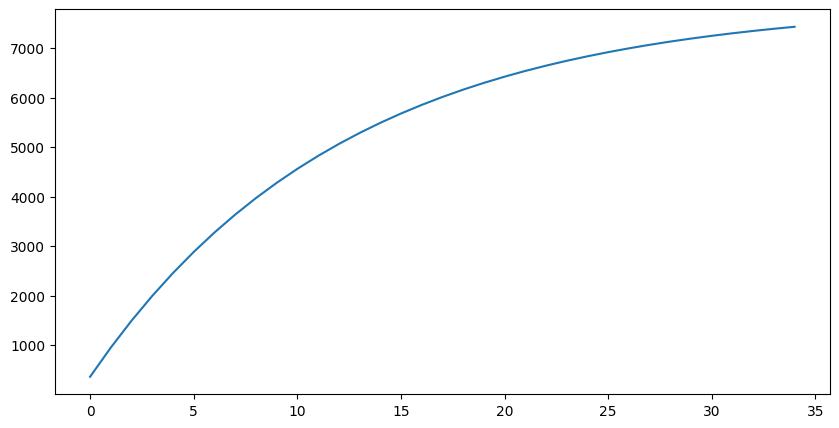

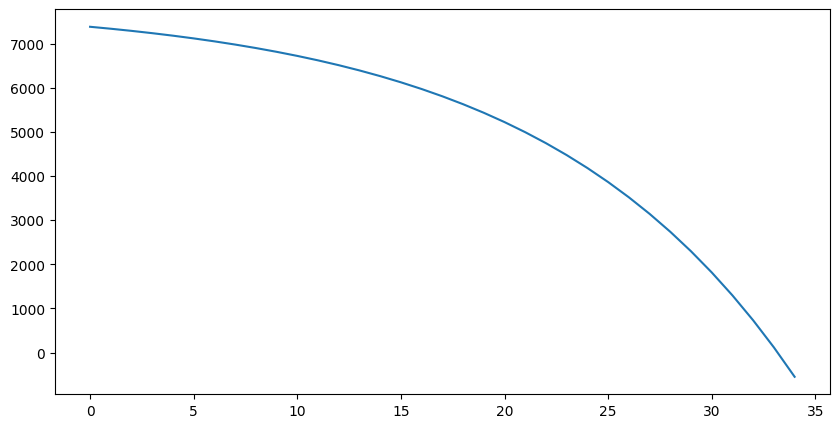

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from Q3_basic_math import calculate_Wn_1
from math import *
from scipy.optimize import fsolve

import random
# 用于记录每一个y_i的位置
line_positions = [0]
L = 1852 * 4
gamma = sin(np.radians(31.5)) / (sin(np.radians(31.5)) + sin(np.radians(28.5)))
step = 0.02*1852
simulate_times = 100

# 设置宽度左右两边的比例关系
west_width_percent = sin(radians(61.5))/(sin(radians(61.5))+sin(radians(58.5)))

# 设置计算出来的宽度
def detect_width(y_position):
    return calculate_Wn_1(y_position)


# 从前向后算
def Solvevalue_1(unsolvedvalue,edge):
    y = unsolvedvalue[0]
    edge = edge
    return [
        detect_width(y)*gamma - y + edge,
    ]
def Calculate_lines_1(y):
    line_positions[0]=y
    while line_positions[-1] <= L:
        width = detect_width(line_positions[-1])
        edge = line_positions[-1]+width*(1-gamma-0.1)
        # print(detect_width(edge)*gamma - edge)
        Solvevalue_1([0],edge)
        y_next = fsolve(Solvevalue_1,[0],args=edge)
        line_positions.append(y_next[0])
    temp1 = line_positions[len(line_positions)-2]
    temp2 = line_positions[-1]
    flag_last = temp1 + detect_width(temp1)*(1-gamma)
    flag_next = temp2 - detect_width(temp2)*(gamma)
    ita = (flag_last-flag_next)/ detect_width(temp1)
    return ita,temp1,temp2,flag_last,flag_next

# 从后向前算
def Solvevalue_2(unsolvedvalue,edge):
    y = unsolvedvalue[0]
    edge = edge
    return [
        detect_width(y)*(1-gamma) + y - edge,
    ]
def Calculate_lines_2(y):
    line_positions[0]=y
    while line_positions[-1] >= 0:
        width = detect_width(line_positions[-1])
        edge = line_positions[-1]-width*(gamma-0.1)
        print(edge)
        Solvevalue_2([0],edge)
        y_next = fsolve(Solvevalue_2,[0],args=edge)
        line_positions.append(y_next[0])
    temp1 = line_positions[len(line_positions)-2]
    temp2 = line_positions[-1]
    flag_last = temp1 - detect_width(temp1)*gamma
    flag_next = temp2 + detect_width(temp2)*(1-gamma)
    ita = (flag_next-flag_last)/ detect_width(temp1)
    return ita,temp1,temp2,flag_last,flag_next


Solvevalue_1([0],0)
solved = fsolve(Solvevalue_1,[0],args=0)
print(solved)
print(Calculate_lines_1(solved[0]))
plt.figure(figsize=(10,5))
plt.plot(line_positions)

line_positions=[0]
Solvevalue_2([0],L)
solved = fsolve(Solvevalue_2,[0],args=L)
print(solved)
print(Calculate_lines_2(solved[0]))
plt.figure(figsize=(10,5))
plt.plot(line_positions)